In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Exploration

Plot heatmap to highlight features with missing values.
Cabin has several missing values. Age has some missing values, which can be filled in.

<AxesSubplot:>

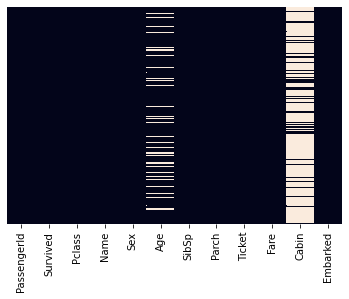

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

Plot histograms and Boxplots to reveal trends in features as well as relationships between different features.

<AxesSubplot:xlabel='Survived', ylabel='count'>

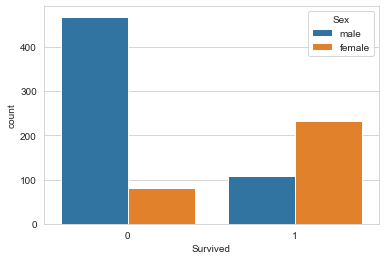

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

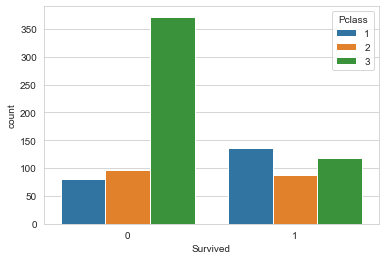

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

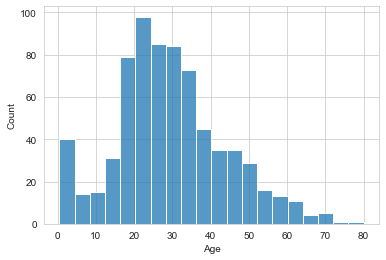

In [8]:
sns.set_style('whitegrid')
sns.histplot(train['Age'].dropna())

<AxesSubplot:xlabel='SibSp', ylabel='count'>

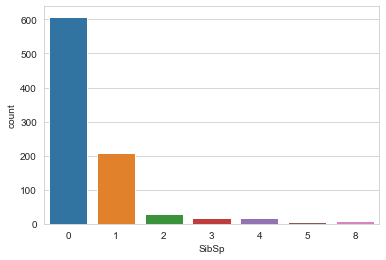

In [9]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

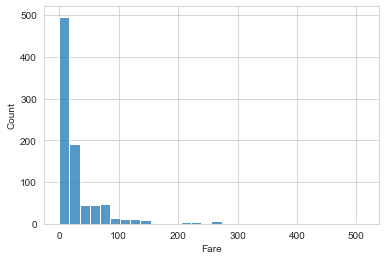

In [10]:
sns.histplot(train['Fare'], bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

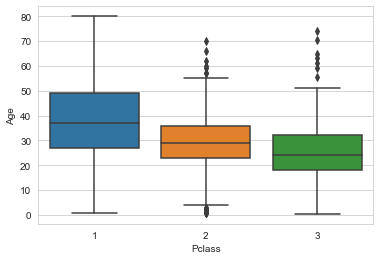

In [11]:
sns.boxplot(x='Pclass',y='Age',data=train,)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

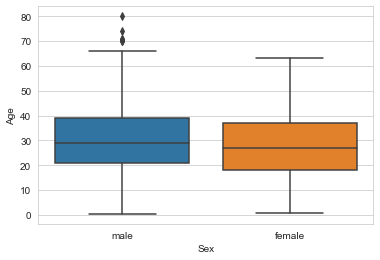

In [12]:
sns.boxplot(x='Sex',y='Age',data=train)

# Data Processing

One way to fill in missing age values is by using the mean age of all the passengers. However, since it was observed that the passengers in the higher classes tend to be older, I am filling in average age based on Pclass.

In [13]:
train['Age'] = train.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
test['Age'] = test.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

There are two missing values for the Embarked feature, which are filled in using the mode of the column.

In [14]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

Missing values for the Fare feature are filled in using the mean of the column.

In [15]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

Tried 2 different ways of dealing with Cabin column: first was to drop it and second was to extract the 'deck' alpha values from it as a new column. This second case is an instance of feature engineering. The code for the second case is commented out because it was not eventually used as it did not seem to perform too well. 

In [16]:
# combined = [train, test]

# for data in combined:
#     data['Cabin'] = data['Cabin'].fillna("X")
#     data['Deck'] = data['Cabin'].apply(lambda x: x[0].upper())

# train = train.drop(['Cabin'], axis=1)
# test = test.drop(['Cabin'], axis=1)

In [17]:
# train.drop(train.loc[train['Deck'] == 'T'].index, inplace=True)

In [18]:
# train['Deck'].value_counts()

Tried 2 different ways of dealing with the Name column: first was to drop it and second was to extract the 'Title' from it as a new column. This second case is an instance of feature engineering. The code for the second case is commented out because it was not eventually used as it did not seem to perform too well. 
Reference for Title extraction code: https://www.datacamp.com/community/tutorials/feature-engineering-kaggle 

In [19]:
# import re
# train['Title'] = train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
# sns.countplot(x='Title', data=train);
# plt.xticks(rotation=45);
# train['Title'] = train['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
# train['Title'] = train['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
#                                             'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Rare')
# sns.countplot(x='Title', data=train);
# plt.xticks(rotation=45);

Tried 2 different ways of dealing with the SibSp and Parch features. Since they both represent # of people traveling with the passenger, they can be combined by adding to form a feature called 'Num_Relatives' (number of relatives). Additionally, a categorical column called 'Travelled_Alone' can be generated that takes 0/1 values depending on whether passenger was alone or not. This is an instance of feature engineering. This case seemed to work well with the validation and test data and therefore was kept as a feature. 

In [20]:
relatives = train['SibSp'] + train['Parch']
train['Num_Relatives'] = train['SibSp'] + train['Parch']
train.loc[train['Num_Relatives'] > 0, 'Travelled_Alone'] = 0
train.loc[train['Num_Relatives'] == 0, 'Travelled_Alone'] = 1
test['Num_Relatives'] = test['SibSp'] + test['Parch']
test.loc[train['Num_Relatives'] > 0, 'Travelled_Alone'] = 0
test.loc[train['Num_Relatives'] == 0, 'Travelled_Alone'] = 1

In [21]:
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [22]:
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null float64
Ticket             891 non-null object
Fare               891 non-null float64
Embarked           891 non-null object
Num_Relatives      891 non-null int64
Travelled_Alone    891 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 76.7+ KB


Name and Ticket are dropped because they have too many unique values and are not adding any useful information to the model. PassengerId is dropped as it is only relevant as a row Id but not relevant as a model input.

In [24]:
train.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

One Hot Encoding is performed for the Sex and Embarked features on a combined set of the train and test data. This is done to ensure that if a category shows up in only the train or only the test data, a column is created for it in both dataframes. 
Note that in the cases when Deck and Title were used for training the model, those features were OHE as well. That part is commented out as it was an iteration that did not make it to the final model. 

In [25]:
ohe = ['Sex', 'Embarked'] #'Deck', 'Title'
combined_final = pd.concat([train, test], axis=0, sort=False)
combined_final = pd.get_dummies(combined_final, prefix=ohe, columns=ohe, drop_first=True)

In [26]:
df_cols = combined_final.columns

In [27]:
df_train = combined_final.iloc[:891,:]
df_test = combined_final.iloc[891:,:]

In [28]:
df_train

,Survived,Pclass,Age,Fare,Num_Relatives,Travelled_Alone,Sex_male,Embarked_Q,Embarked_S
0,0.0,3,22.00000,7.2500,1,0.0,1,0,1
1,1.0,1,38.00000,71.2833,1,0.0,0,0,0
2,1.0,3,26.00000,7.9250,0,1.0,0,0,1
3,1.0,1,35.00000,53.1000,1,0.0,0,0,1
4,0.0,3,35.00000,8.0500,0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.00000,13.0000,0,1.0,1,0,1
887,1.0,1,19.00000,30.0000,0,1.0,0,0,1
888,0.0,3,25.14062,23.4500,3,0.0,0,0,1
889,1.0,1,26.00000,30.0000,0,1.0,1,0,0


Normalize the data using MinMaxScaler. Use the range from the training data and apply a transform to the test data.

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_arr = scaler.fit_transform(df_train)
test_arr = scaler.transform(df_test)

In [30]:
train_final = pd.DataFrame(train_arr, columns=df_cols)
test_final = pd.DataFrame(test_arr, columns=df_cols)

In [31]:
# train_final.drop(['Deck_T'], axis=1, inplace=True)
# test_final.drop(['Deck_T'], axis=1, inplace=True)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_val, y_train, y_val = train_test_split(train_final.drop('Survived', axis=1), 
                                                    train_final['Survived'], test_size=0.30, 
                                                    random_state=101)

# Logistic Regression Model (Using sklearn - only for testing purposes)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [36]:
predictions = logmodel.predict(X_val)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       154
         1.0       0.81      0.66      0.72       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [39]:
from sklearn.metrics import accuracy_score
round((accuracy_score(y_val, predictions, normalize=True)),3)

0.787

# Logistic Regression Model (using from scratch implementation - used as the actual model for Kaggle submission)

In [40]:
def sigmoid(z):
   return 1/(1+np.exp(-z))

In [41]:
def f(X, theta):
    """The sigmoid model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return sigmoid(X.dot(theta))

In [42]:
def log_likelihood(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    We added the 1e-6 term in order to avoid overflow (inf and -inf).
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return (y*np.log(f(X, theta) + 1e-6) + (1-y)*np.log(1-f(X, theta) + 1e-6)).mean()

In [43]:
def loglik_gradient(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta)-y) * X.T, axis=1)

In [44]:
#add bias columns to training data
X_train['bias'] = 1
X_val['bias'] = 1
num_cols = X_val.shape[1]

In [45]:
threshold = 5e-5
step_size = 1e-1

theta, theta_prev = np.zeros((num_cols,)), np.ones((num_cols,))
opt_pts = [theta]
opt_grads = []
iter = 0
X_train_t = X_train.to_numpy()
y_train_t = y_train.to_numpy()

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 50000 == 0:
        print('Iteration %d. Log-likelihood: %.6f' % (iter, log_likelihood(theta, X_train_t, y_train_t)))
    theta_prev = theta
    gradient = loglik_gradient(theta, X_train_t, y_train_t)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. Log-likelihood: -0.693145


In [46]:
X_val_t = X_val.to_numpy()
y_val_preds = f(X_val_t, theta)
y_val_preds[y_val_preds<0.5] = 0
y_val_preds[y_val_preds>=0.5] = 1

In [47]:
theta.shape

(9,)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_val_preds))

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       154
         1.0       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [49]:
from sklearn.metrics import accuracy_score
round((accuracy_score(y_val,y_val_preds,normalize=True)),3)

0.787

# Re-Train using entire Training set and predict using Test set (for Kaggle submission)

In [50]:
X_train_kaggle = train_final.drop(['Survived'], axis=1)
X_train_kaggle['bias'] = 1
y_train_kaggle = train_final['Survived']
num_cols_k = X_val.shape[1]

In [51]:
test_final['bias'] = 1
test_final.drop('Survived', axis=1, inplace=True)

In [52]:
threshold = 5e-5
step_size = 1e-1

theta_k, theta_prev_k = np.zeros((num_cols_k,)), np.ones((num_cols_k,))
opt_pts_k = [theta_k]
opt_grads_k = []
iter = 0
X_train_k = X_train_kaggle.to_numpy()
y_train_k = y_train_kaggle.to_numpy()

while np.linalg.norm(theta_k - theta_prev_k) > threshold:
    if iter % 50000 == 0:
        print('Iteration %d. Log-likelihood: %.6f' % (iter, log_likelihood(theta_k, X_train_k, y_train_k)))
    theta_prev_k = theta_k
    gradient_k = loglik_gradient(theta_k, X_train_k, y_train_k)
    theta_k = theta_prev_k - step_size * gradient_k
    opt_pts_k += [theta_k]
    opt_grads_k += [gradient_k]
    iter += 1

Iteration 0. Log-likelihood: -0.693145


In [53]:
# test_final.drop('Deck_T', axis=1, inplace=True)

In [54]:
test_final

,Pclass,Age,Fare,Num_Relatives,Travelled_Alone,Sex_male,Embarked_Q,Embarked_S,bias
0,1.0,0.428248,0.015282,0.0,0.0,1.0,1.0,0.0,1
1,1.0,0.585323,0.013663,0.1,0.0,0.0,0.0,1.0,1
2,0.5,0.773813,0.018909,0.0,1.0,1.0,1.0,0.0,1
3,1.0,0.334004,0.016908,0.0,0.0,1.0,0.0,1.0,1
4,1.0,0.271174,0.023984,0.2,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
413,1.0,0.296657,0.015713,0.0,1.0,1.0,0.0,1.0,1
414,0.0,0.484795,0.212559,0.0,1.0,0.0,0.0,0.0,1
415,1.0,0.478512,0.014151,0.0,1.0,1.0,0.0,1.0,1
416,1.0,0.296657,0.015713,0.0,0.0,1.0,0.0,1.0,1


In [55]:
y_pred_kaggle = f(test_final, theta_k)
y_pred_kaggle[y_pred_kaggle<0.5] = 0
y_pred_kaggle[y_pred_kaggle>=0.5] = 1
y_pred_kaggle = y_pred_kaggle.astype(int)

In [56]:
y_pred_kaggle

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [57]:
test_ids = pd.read_csv('titanic/test.csv')['PassengerId']

In [58]:
kaggle_submit = pd.concat([test_ids, y_pred_kaggle], axis=1)
kaggle_submit = kaggle_submit.rename(columns={0: "Survived"})
kaggle_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [59]:
kaggle_submit.to_csv('titanic_kaggle_submission_case4.csv', index=False)